In [1]:
from linearmodels import PooledOLS
import statsmodels.api as sm
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from linearmodels import PanelOLS

%matplotlib inline 

## Data Importing

In [2]:
product_category_name_translation=pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/product_category_name_translation.csv")

In [3]:
causal_df_all_products =  pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_all_products_resampled.csv")
causal_df_elastic_products = pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_elastic_products.csv")
causal_df_veblen_products = pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_veblen_products.csv")
causal_df_neg_PED_products = pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_neg_PED_elastic_prods_products.csv")
causal_inelastic_products=pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_inelastic_products.csv")

C:\Users\akankshasaxena3\AppData\Local\Temp\ipykernel_38596\2823244794.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  causal_df_all_products =  pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_all_products_resampled.csv")
C:\Users\akankshasaxena3\AppData\Local\Temp\ipykernel_38596\2823244794.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  causal_df_elastic_products = pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_elastic_products.csv")
C:\Users\akankshasaxena3\AppData\Local\Temp\ipykernel_38596\2823244794.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  causal_inelastic_products=pd.read_csv("C:/Users/akankshasaxena3/Downloads/olist/purhcase_proba_inelastic_products.csv")


### Adding English transaltion of product category names to all datasets

In [4]:
def print_shape(data,data_name):
    print(f"shape of the DataFrame {data_name} ="+ str(data.shape))
            
def add_english_translation_prod_name(data):
    final = pd.merge(data,product_category_name_translation,on = 'product_category_name',how ='left')
    return final


In [5]:
dataframes_dict = {'causal_df_all_products': causal_df_all_products, 'causal_df_elastic_products': causal_df_elastic_products, 'causal_df_veblen_products': causal_df_veblen_products, 'causal_df_neg_PED_products': causal_df_neg_PED_products,'causal_inelastic_products':causal_inelastic_products}

In [6]:
dataframes_dict['causal_df_all_products'].shape,causal_df_all_products.shape

((116502, 38), (116502, 38))

In [7]:
for df_name, df in dataframes_dict.items():
    print_shape(df,df_name)
    globals()[df_name] = add_english_translation_prod_name(df)
    print_shape(globals()[df_name], df_name)
    print('------------------------------------->>>>>>>>>>')

shape of the DataFrame causal_df_all_products =(116502, 38)
shape of the DataFrame causal_df_all_products =(116502, 39)
------------------------------------->>>>>>>>>>
shape of the DataFrame causal_df_elastic_products =(42357, 38)
shape of the DataFrame causal_df_elastic_products =(42357, 39)
------------------------------------->>>>>>>>>>
shape of the DataFrame causal_df_veblen_products =(28473, 38)
shape of the DataFrame causal_df_veblen_products =(28473, 39)
------------------------------------->>>>>>>>>>
shape of the DataFrame causal_df_neg_PED_products =(13884, 38)
shape of the DataFrame causal_df_neg_PED_products =(13884, 39)
------------------------------------->>>>>>>>>>
shape of the DataFrame causal_inelastic_products =(74145, 38)
shape of the DataFrame causal_inelastic_products =(74145, 39)
------------------------------------->>>>>>>>>>


In [8]:
causal_df_all_products[causal_df_all_products['product_category_name'] == 'miscellaneous'].shape

(1767, 39)

In [9]:
causal_df_veblen_products.shape

(28473, 39)

In [10]:
causal_df_all_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116502 entries, 0 to 116501
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0.1                   116502 non-null  int64  
 1   Unnamed: 0                     116502 non-null  int64  
 2   order_id                       116502 non-null  object 
 3   customer_id                    116502 non-null  object 
 4   order_status                   116502 non-null  object 
 5   order_purchase_timestamp       116502 non-null  object 
 6   order_estimated_delivery_date  116502 non-null  object 
 7   product_id                     116502 non-null  object 
 8   purchase_proba                 116502 non-null  int64  
 9   customer_unique_id             116502 non-null  object 
 10  customer_zip_code_prefix       116502 non-null  int64  
 11  customer_city                  116502 non-null  object 
 12  customer_state                

In [11]:
causal_df_elastic_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42357 entries, 0 to 42356
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0.1                   42357 non-null  int64  
 1   Unnamed: 0                     42357 non-null  int64  
 2   order_id                       42357 non-null  object 
 3   customer_id                    42357 non-null  object 
 4   order_status                   42357 non-null  object 
 5   order_purchase_timestamp       42357 non-null  object 
 6   order_estimated_delivery_date  42357 non-null  object 
 7   product_id                     42357 non-null  object 
 8   purchase_proba                 42357 non-null  int64  
 9   customer_unique_id             42357 non-null  object 
 10  customer_zip_code_prefix       42357 non-null  int64  
 11  customer_city                  42357 non-null  object 
 12  customer_state                 42357 non-null 

### Preprocessing datasets

In [12]:
causal_df_all_products['order_purchase_timestamp']= pd.to_datetime(causal_df_all_products['order_purchase_timestamp'])
causal_df_elastic_products['order_purchase_timestamp']= pd.to_datetime(causal_df_elastic_products['order_purchase_timestamp'])
causal_df_veblen_products['order_purchase_timestamp']= pd.to_datetime(causal_df_veblen_products['order_purchase_timestamp'])
causal_df_neg_PED_products['order_purchase_timestamp']= pd.to_datetime(causal_df_neg_PED_products['order_purchase_timestamp'])
causal_inelastic_products['order_purchase_timestamp']= pd.to_datetime(causal_inelastic_products['order_purchase_timestamp'])

In [13]:
causal_df_all_products['year'] = causal_df_all_products['order_purchase_timestamp'].dt.year
causal_df_elastic_products['year'] = causal_df_elastic_products['order_purchase_timestamp'].dt.year
causal_df_veblen_products['year'] = causal_df_veblen_products['order_purchase_timestamp'].dt.year
causal_df_neg_PED_products['year'] = causal_df_neg_PED_products['order_purchase_timestamp'].dt.year
causal_inelastic_products['year'] = causal_inelastic_products['order_purchase_timestamp'].dt.year

In [14]:
causal_df_all_products['month'] = causal_df_all_products['order_purchase_timestamp'].dt.month
causal_df_elastic_products['month'] = causal_df_elastic_products['order_purchase_timestamp'].dt.month
causal_df_veblen_products['month'] = causal_df_veblen_products['order_purchase_timestamp'].dt.month
causal_df_neg_PED_products['month'] = causal_df_neg_PED_products['order_purchase_timestamp'].dt.month
causal_inelastic_products['month'] = causal_inelastic_products['order_purchase_timestamp'].dt.month

In [15]:
causal_df_all_products['month'].value_counts()

8     12427
5     12307
7     11896
3     11542
6     10839
4     10828
2      9984
1      9845
11     9716
12     6665
10     5549
9      4904
Name: month, dtype: int64

In [16]:
causal_df_veblen_products['year'].value_counts()

2018    17094
2017    11308
2016       71
Name: year, dtype: int64

In [17]:
causal_df_all_products['year'].value_counts()

2018    63827
2017    52323
2016      352
Name: year, dtype: int64

In [18]:
causal_df_elastic_products['year'].value_counts()

2018    24243
2017    18028
2016       86
Name: year, dtype: int64

Post obtaining consumer purchase probability, the study employs causal analysis to check the impact of dynamic pricing policy on consumer behvaior. For this purpose continous DID estimator is utilized in this study. Usually continous DID estimator is calbirated using Two-way-fixed-effects regression model.

## TWFE for all products

### EDA for all products

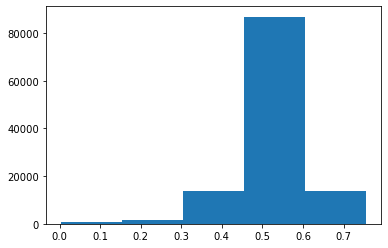

In [19]:
plt.hist(causal_df_all_products['est_purchase_proba'],bins = 5)
plt.show()

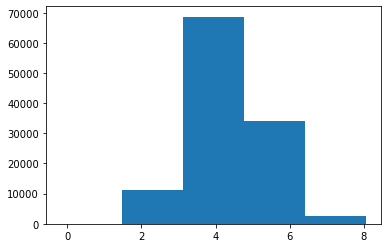

In [20]:
plt.hist(np.log(causal_df_all_products['optimal_prices_RF']),bins = 5)
plt.show()

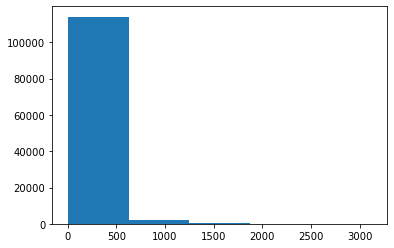

In [21]:
plt.hist(causal_df_all_products['optimal_prices_RF'],bins = 5)
plt.show()

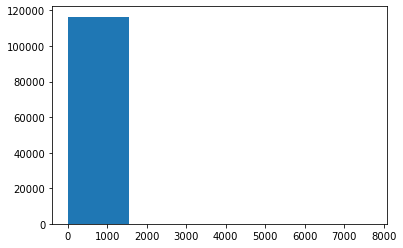

In [22]:
plt.hist(causal_df_all_products['abs_PED'],bins = 5)
plt.show()

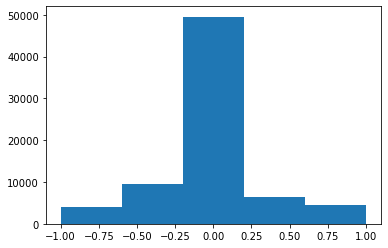

In [23]:
plt.hist(causal_df_all_products[causal_df_all_products['abs_PED']<1]['coef_log_price'],bins = 5)
plt.show()


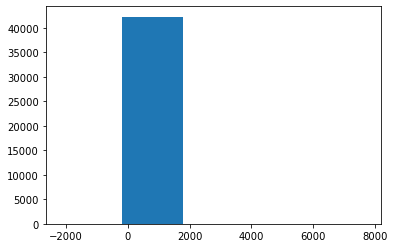

In [24]:
plt.hist(causal_df_all_products[causal_df_all_products['abs_PED']>1]['coef_log_price'],bins = 5)
plt.show()

In [25]:
causal_df_all_products.query('abs_PED > 1 and coef_log_price > 0')['product_id'].nunique()/causal_df_all_products['product_id'].nunique()*100

20.100807675957977

Only 20% products are elastic

In [26]:
causal_df_all_products.query('abs_PED > 1 and coef_log_price > 0')['order_status'].value_counts()

delivered      27905
shipped          294
canceled         103
invoiced         102
processing        67
unavailable        1
approved           1
Name: order_status, dtype: int64

In [27]:
causal_df_all_products['order_status'].value_counts()

delivered      114011
shipped          1295
canceled          481
invoiced          371
processing        334
unavailable         8
approved            2
Name: order_status, dtype: int64

### TWFE with only price and no control variables

In [28]:

model_cluster = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+log(optimal_prices_RF):post+ EntityEffects+TimeEffects"
           ),
  data=causal_df_all_products.set_index(['product_id', 'month']),
).fit(cov_type="clustered", cluster_entity=True)

In [29]:
model_cluster

Dep. Variable:,log(est_purchase_proba),R-squared:,0.0014
Estimator:,PanelOLS,R-squared (Between):,0.0018
No. Observations:,116502,R-squared (Within):,0.0020
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.0097
Time:,09:15:08,Log-likelihood,1.137e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,116.55
Entities:,32934,P-value,0.0000
Avg Obs:,3.5374,Distribution:,"F(1,83556)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,36.184


### TWFE with price as treatment variable and demographic control variables

In [30]:

model_cluster2 = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post + aging_index+sex_ratio + Median_age +state_Freq_Encoded+ EntityEffects+TimeEffects"
           ),
  data=causal_df_all_products.set_index(['product_id', 'month']),
).fit(cov_type="clustered", cluster_entity=True)

In [31]:
model_cluster2

Dep. Variable:,log(est_purchase_proba),R-squared:,0.9630
Estimator:,PanelOLS,R-squared (Between):,0.0959
No. Observations:,116502,R-squared (Within):,0.9630
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.2400
Time:,09:15:14,Log-likelihood,3.057e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,4.35e+05
Entities:,32934,P-value,0.0000
Avg Obs:,3.5374,Distribution:,"F(5,83552)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,3.145e+04


### TWFE with price as treatment variable,demographic control variables and price also control variable

In [78]:

model_cluster3 = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF)+np.log(optimal_prices_RF):post +sex_ratio + Median_age +state_Freq_Encoded+ EntityEffects+TimeEffects"
           ),
  data=causal_df_all_products.set_index(['product_id', 'month']),
).fit()

In [79]:
model_cluster3

Dep. Variable:,log(est_purchase_proba),R-squared:,0.9640
Estimator:,PanelOLS,R-squared (Between):,0.2085
No. Observations:,116502,R-squared (Within):,0.9639
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.3490
Time:,09:32:55,Log-likelihood,3.072e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.469e+05
Entities:,32934,P-value,0.0000
Avg Obs:,3.5374,Distribution:,"F(5,83552)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,4.469e+05


## TWFE elastic products

### TWFE with only price and no control variables

In [34]:

model_cluster = PanelOLS.from_formula(
  formula=("np.log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post + EntityEffects+TimeEffects"
           ),
  data=causal_df_elastic_products.set_index(['product_id', 'month']),
).fit()

In [35]:
model_cluster

Dep. Variable:,np.log(est_purchase_proba),R-squared:,6.637e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0478
No. Observations:,42357,R-squared (Within):,6.096e-05
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.0018
Time:,09:15:22,Log-likelihood,5.043e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.3272
Entities:,7284,P-value,0.1271
Avg Obs:,5.8151,Distribution:,"F(1,35061)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,2.3272


### TWFE with price as treatment variable and demographic control variables

In [36]:

model_cluster2 = PanelOLS.from_formula(
  formula=("np.log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post + state_Freq_Encoded+sex_ratio+aging_index + Median_age + EntityEffects+TimeEffects"
           ),
  data=causal_df_elastic_products.set_index(['product_id', 'month']),
).fit()

In [37]:
model_cluster2

Dep. Variable:,np.log(est_purchase_proba),R-squared:,0.2598
Estimator:,PanelOLS,R-squared (Between):,0.1492
No. Observations:,42357,R-squared (Within):,0.2599
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.2312
Time:,09:15:24,Log-likelihood,5.68e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2461.2
Entities:,7284,P-value,0.0000
Avg Obs:,5.8151,Distribution:,"F(5,35057)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,2461.2


### TWFE with price as treatment variable,demographic control variables and price also control variable

In [80]:

model_cluster3 = PanelOLS.from_formula(
  formula=("np.log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF)+np.log(optimal_prices_RF):post +sex_ratio+ state_Freq_Encoded + Median_age + EntityEffects+TimeEffects"
           ),
  data=causal_df_elastic_products.set_index(['product_id', 'month']),
).fit()

In [81]:
model_cluster3

Dep. Variable:,np.log(est_purchase_proba),R-squared:,0.2570
Estimator:,PanelOLS,R-squared (Between):,0.2188
No. Observations:,42357,R-squared (Within):,0.2571
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.2547
Time:,09:33:50,Log-likelihood,5.672e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2425.6
Entities:,7284,P-value,0.0000
Avg Obs:,5.8151,Distribution:,"F(5,35057)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,2425.6


## TWFE Veblen products

### EDA for Veblen Products

In [40]:
veblen_prod_categories=causal_df_veblen_products['product_category_name_english'].value_counts().reset_index().rename(columns={'index':'category_name'})

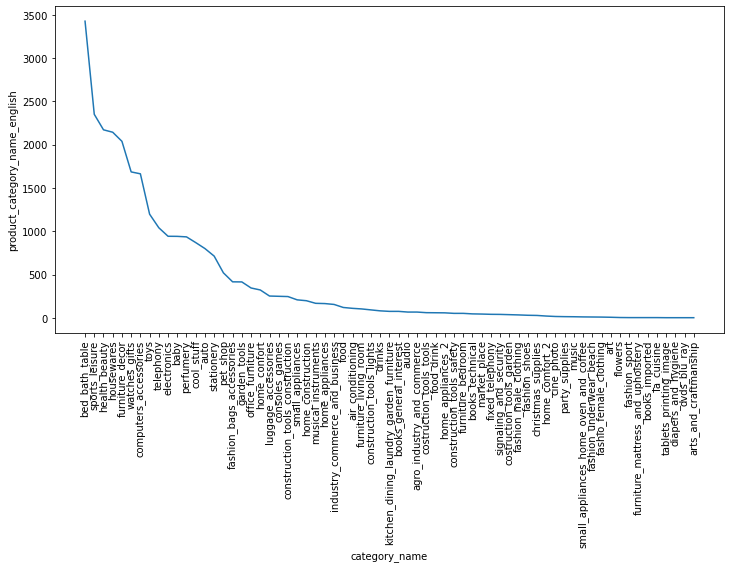

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='category_name',y='product_category_name_english',data = veblen_prod_categories)
plt.xticks(rotation=90)
plt.show()

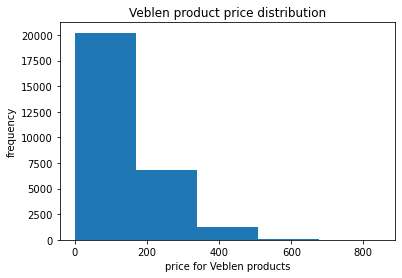

In [42]:
plt.hist(causal_df_veblen_products['optimal_prices_RF'],bins =5)
plt.xlabel('price for Veblen products')
plt.ylabel('frequency')
plt.title('Veblen product price distribution')
plt.show()

In [43]:
causal_df_veblen_products['optimal_prices_RF'].describe()

count    28473.000000
mean       128.758468
std        106.818705
min          0.850000
25%         49.000000
50%         89.900000
75%        198.000000
max        845.000000
Name: optimal_prices_RF, dtype: float64

In [44]:
causal_df_veblen_products[causal_df_veblen_products['optimal_prices_RF']>200]['est_purchase_proba'].describe()

count    6630.000000
mean        0.401208
std         0.077941
min         0.075713
25%         0.351201
50%         0.401525
75%         0.449160
max         0.715012
Name: est_purchase_proba, dtype: float64

In [45]:
causal_df_veblen_products[causal_df_veblen_products['optimal_prices_RF']<200]['est_purchase_proba'].describe()

count    21818.000000
mean         0.545911
std          0.070707
min          0.301502
25%          0.499684
50%          0.549777
75%          0.592890
max          0.903552
Name: est_purchase_proba, dtype: float64

The rationale behind the control variable, price, exhibiting an inverse relationship with consumer purchase probability for Veblen/Giffen products lies in the fact that the average purchase probability for higher prices is, on average, lower than that for lower prices for overall dataset including pre and post-intervention period.

In [46]:
causal_df_veblen_products['product_category_name'].nunique()

70

### TWFE with only price and no control variables

In [47]:
model_cluster = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post + EntityEffects+TimeEffects"
           ),
  data=causal_df_veblen_products.set_index(['product_id', 'month']),
).fit()

In [48]:
model_cluster

Dep. Variable:,log(est_purchase_proba),R-squared:,4.399e-06
Estimator:,PanelOLS,R-squared (Between):,-0.1203
No. Observations:,28473,R-squared (Within):,2.2e-05
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.0007
Time:,09:15:30,Log-likelihood,2.352e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.0961
Entities:,6620,P-value,0.7566
Avg Obs:,4.3011,Distribution:,"F(1,21841)"
Min Obs:,1.0000,,
Max Obs:,811.00,F-statistic (robust):,0.0961


### TWFE with price as treatment variable and demographic control variables

In [72]:
model_cluster2 = PanelOLS.from_formula(
  formula=("np.log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post +sex_ratio+ aging_index + Median_age+state_Freq_Encoded + EntityEffects+TimeEffects"
           ),
  data=causal_df_veblen_products.set_index(['product_id', 'month']),
).fit()

In [73]:
model_cluster2

Dep. Variable:,np.log(est_purchase_proba),R-squared:,0.9382
Estimator:,PanelOLS,R-squared (Between):,0.1007
No. Observations:,28473,R-squared (Within):,0.9374
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.3139
Time:,09:28:27,Log-likelihood,6.316e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.63e+04
Entities:,6620,P-value,0.0000
Avg Obs:,4.3011,Distribution:,"F(5,21837)"
Min Obs:,1.0000,,
Max Obs:,811.00,F-statistic (robust):,6.63e+04


### TWFE with price as treatment variable,demographic control variables and price also control variable

In [82]:
model_cluster3 = PanelOLS.from_formula(
  formula=("np.log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF)+np.log(optimal_prices_RF):post +sex_ratio + Median_age+state_Freq_Encoded + EntityEffects+TimeEffects"
           ),
  data=causal_df_veblen_products.set_index(['product_id', 'month']),
).fit()

In [83]:
model_cluster3

Dep. Variable:,np.log(est_purchase_proba),R-squared:,0.8420
Estimator:,PanelOLS,R-squared (Between):,0.8264
No. Observations:,28473,R-squared (Within):,0.8417
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.7797
Time:,09:35:39,Log-likelihood,4.979e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.327e+04
Entities:,6620,P-value,0.0000
Avg Obs:,4.3011,Distribution:,"F(5,21837)"
Min Obs:,1.0000,,
Max Obs:,811.00,F-statistic (robust):,2.327e+04


## TWFE neg PED elastic prods

### EDA for elastic products with negative PED

In [53]:
negPED_prod_categories=causal_df_neg_PED_products['product_category_name_english'].value_counts().reset_index().rename(columns={'index':'category_name'})

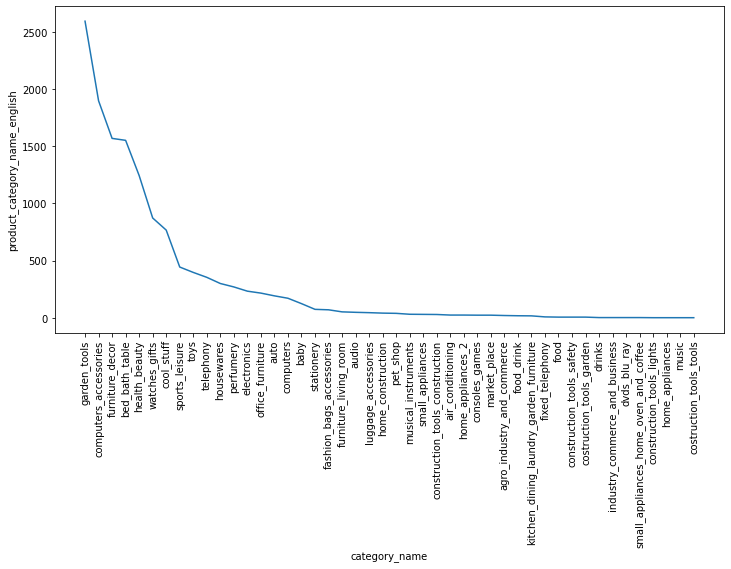

In [54]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='category_name',y='product_category_name_english',data = negPED_prod_categories)
plt.xticks(rotation=90)
plt.show()

In [55]:
causal_df_neg_PED_products['product_category_name'].nunique()

47

### TWFE with price as treatment variable,and no control variables

In [56]:
model_cluster = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post + EntityEffects+TimeEffects"
           ),
  data=causal_df_neg_PED_products.set_index(['product_id', 'month']),
).fit()

In [57]:
model_cluster

Dep. Variable:,log(est_purchase_proba),R-squared:,9.253e-07
Estimator:,PanelOLS,R-squared (Between):,-0.4542
No. Observations:,13884,R-squared (Within):,-4.466e-05
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.0002
Time:,09:15:34,Log-likelihood,1.429e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.0122
Entities:,664,P-value,0.9120
Avg Obs:,20.910,Distribution:,"F(1,13208)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,0.0122


### TWFE with price as treatment variable and demographic control variables

In [58]:
model_cluster2 = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post +sex_ratio+ aging_index + Median_age+state_Freq_Encoded + EntityEffects+TimeEffects"
           ),
  data=causal_df_neg_PED_products.set_index(['product_id', 'month']),
).fit()

In [59]:
model_cluster2

Dep. Variable:,log(est_purchase_proba),R-squared:,0.7450
Estimator:,PanelOLS,R-squared (Between):,-0.4203
No. Observations:,13884,R-squared (Within):,0.7440
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.1118
Time:,09:15:35,Log-likelihood,2.378e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,7716.5
Entities:,664,P-value,0.0000
Avg Obs:,20.910,Distribution:,"F(5,13204)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,7716.5


### TWFE with price as treatment variable,demographic control variables and price also control variable

In [84]:
model_cluster3 = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF)+np.log(optimal_prices_RF):post +sex_ratio + Median_age+state_Freq_Encoded + EntityEffects+TimeEffects"
           ),
  data=causal_df_neg_PED_products.set_index(['product_id', 'month']),
).fit()

In [85]:
model_cluster3

Dep. Variable:,log(est_purchase_proba),R-squared:,0.7471
Estimator:,PanelOLS,R-squared (Between):,-0.1323
No. Observations:,13884,R-squared (Within):,0.7461
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.3119
Time:,09:37:44,Log-likelihood,2.383e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,7801.0
Entities:,664,P-value,0.0000
Avg Obs:,20.910,Distribution:,"F(5,13204)"
Min Obs:,1.0000,,
Max Obs:,955.00,F-statistic (robust):,7801.0


## TWFE inelastic products

### TWFE with price as treatment variable,and no control variables

In [62]:
model_cluster = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post +EntityEffects+TimeEffects"
           ),
  data=causal_inelastic_products.set_index(['product_id', 'month']),
).fit()

In [63]:
model_cluster

Dep. Variable:,log(est_purchase_proba),R-squared:,0.0021
Estimator:,PanelOLS,R-squared (Between):,0.0112
No. Observations:,74145,R-squared (Within):,0.0025
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.0140
Time:,09:15:39,Log-likelihood,6.644e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,101.71
Entities:,25650,P-value,0.0000
Avg Obs:,2.8906,Distribution:,"F(1,48483)"
Min Obs:,1.0000,,
Max Obs:,560.00,F-statistic (robust):,101.71


### TWFE with price as treatment variable and demographic control variables

In [64]:
model_cluster2 = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF):post +sex_ratio+ aging_index + Median_age+state_Freq_Encoded + EntityEffects+TimeEffects"
           ),
  data=causal_inelastic_products.set_index(['product_id', 'month']),
).fit()

In [65]:
model_cluster2

Dep. Variable:,log(est_purchase_proba),R-squared:,0.9748
Estimator:,PanelOLS,R-squared (Between):,0.1833
No. Observations:,74145,R-squared (Within):,0.9748
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.3419
Time:,09:15:43,Log-likelihood,2.028e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3.752e+05
Entities:,25650,P-value,0.0000
Avg Obs:,2.8906,Distribution:,"F(5,48479)"
Min Obs:,1.0000,,
Max Obs:,560.00,F-statistic (robust):,3.752e+05


### TWFE with price as treatment variable,demographic control variables and price also control variable

In [86]:
model_cluster3 = PanelOLS.from_formula(
  formula=("log(est_purchase_proba) ~ 1+np.log(optimal_prices_RF)+np.log(optimal_prices_RF):post +sex_ratio + Median_age+state_Freq_Encoded + EntityEffects+TimeEffects"
           ),
  data=causal_inelastic_products.set_index(['product_id', 'month']),
).fit()

In [87]:
model_cluster3

Dep. Variable:,log(est_purchase_proba),R-squared:,0.9755
Estimator:,PanelOLS,R-squared (Between):,0.2737
No. Observations:,74145,R-squared (Within):,0.9754
Date:,"Sat, Mar 09 2024",R-squared (Overall):,0.4244
Time:,09:38:41,Log-likelihood,2.038e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3.856e+05
Entities:,25650,P-value,0.0000
Avg Obs:,2.8906,Distribution:,"F(5,48479)"
Min Obs:,1.0000,,
Max Obs:,560.00,F-statistic (robust):,3.856e+05
